# <center>Lab Assignment 3<center>

## <center>Yihan Li, UCLA MQE Class 2025<center>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [25]:
import os
notebook_path = "your_notebook_file.ipynb"  # Replace with the actual notebook file path
notebook_dir = os.path.dirname(os.path.abspath(notebook_path))
print(notebook_dir)

/Users/richard/Desktop


In [26]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [27]:
y.index = y.name

In [28]:
y = pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [29]:
y.index = pd.to_datetime(y.index)

In [30]:
# Assumptions Null ARE
y = y.fillna(0.).sort_index()

# 2.) Normalize all the X data

In [32]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [33]:
from pytrends.request import TrendReq

In [34]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Phone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price",
            "Recession","Chip Costs","Taylor Swift Tickets","Is the Earth Flat","Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [35]:
X = df.resample("Q").mean()
temp = pd.concat([y,X],axis=1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .1)
lasso.fit(X_scaled,y)
coefficients = lasso.coef_

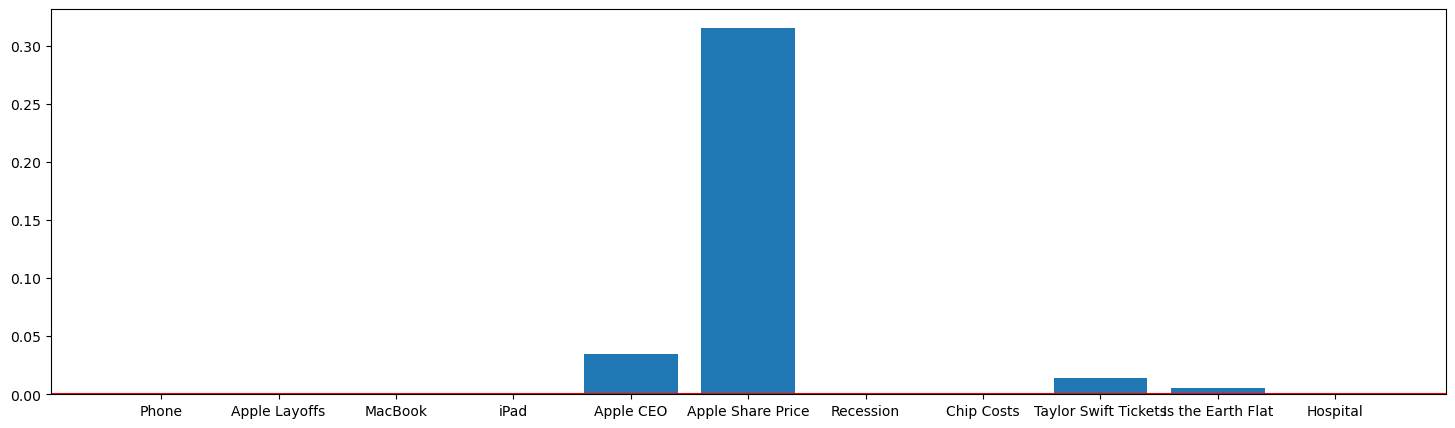

In [38]:
plt.figure(figsize = (18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label=X.columns)
plt.axhline(0.,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Yes, it make sense. The threee coefficients are the main factors that influence the price of Apple stock.